# Preprocess

Read data into ```data``` which is a ```np.array```

Read y into ```y``` also a ```np.array```

```update(wn, x, y, correct = True)``` is for updating weight

In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt

data_list = []
y = []
# read file into data and y
with open("data.txt", 'r') as file:
    for line in file:
        values = line.strip().split()
        values = [float(value) for value in values]
        values.insert(0, 1)
        data_list.append(values[0:-1])
        y.append(values[-1])

data = np.array(data_list)
y = np.array(y)

# some const.
data_size = y.size
dimension = data[0].size

# for later use, for updating w
def update(wn, x, y, correct = True):
    correct = True
    if(np.dot(wn,x)*y <= 0):
        wn += x*y
        correct = False
    return wn, correct


# Problem 9

Please first follow page 4/22 of Lecture 2, and add x0 = 1 to every xn. Implement a version of PLA that randomly picks an example (xn,yn) in every iteration, and updates wt if and only if wt is incorrect on the example. Note that the random picking can be simply implemented with replacement—that is, the same example can be picked multiple times, even consecutively. Stop updating and return wt as wPLA if wt is correct consecutively after checking 5N randomly-picked examples.

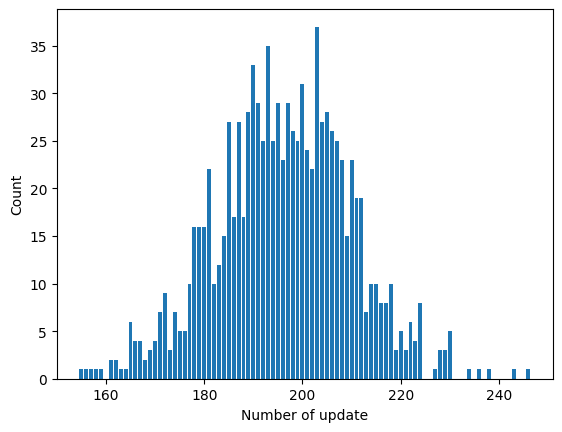

Median: 196.0


In [32]:
# 9
total_update_cnt = np.zeros(1000)
# use seed 0-999
for seed in range(1000):
    random.seed(seed)
    success_cnt = 0
    update_cnt = 0
    wpla = np.zeros(dimension)
    # check until 5N is enough
    while success_cnt < 5*data_size:
        # random pick index
        rand_index = random.randint(0,data_size-1)
        # check and update
        wpla, correct = update(wpla, data[rand_index], y[rand_index])
        if correct:
            success_cnt+=1
        else:
            update_cnt+=1
    total_update_cnt[seed] = update_cnt

# plot
unique_elements, counts = np.unique(total_update_cnt, return_counts=True)
plt.bar(unique_elements, counts)
plt.xlabel('Number of update')
plt.ylabel('Count')
plt.show()
print("Median:", np.median(total_update_cnt))


We can see that the plot is almost like normal distribution
The Median is 196.0

# Problem 10

Scale up each xn by 11.26, including scaling each x0 from 1 to 11.26. Then, run PLA on the scaled examples for 1000 experiments, each with a different random seed. Plot a histogram to visualize the distribution of the number of updates needed before returning wPLA. What is the median number of updates? Compare your result to that of Problem 9. Describe your findings.


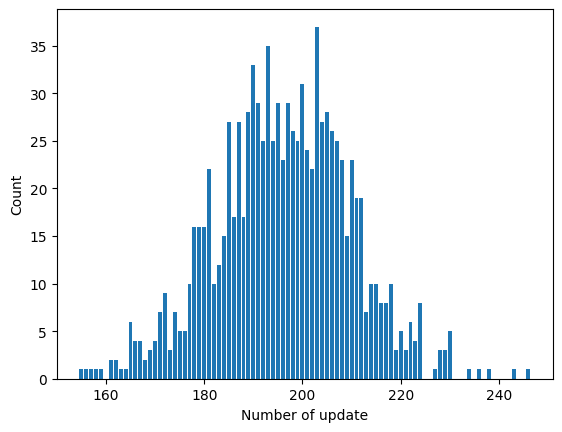

Median: 196.0


In [33]:
# 10

# whole data * 11.26
data1126 = data*11.26
total_update_cnt = np.zeros(1000)
for seed in range(1000):
    random.seed(seed)
    success_cnt = 0
    update_cnt = 0
    wpla = np.zeros(dimension)
    while success_cnt < 5*data_size:
        rand_index = random.randint(0,data_size-1)
        wpla, correct = update(wpla, data1126[rand_index], y[rand_index])
        if correct:
            success_cnt+=1
        else:
            update_cnt+=1
    total_update_cnt[seed] = update_cnt

unique_elements, counts = np.unique(total_update_cnt, return_counts=True)
plt.bar(unique_elements, counts)
plt.xlabel('Number of update')
plt.ylabel('Count')
plt.show()
print("Median:", np.median(total_update_cnt))


The result didn't change at all, the median is still 196.0, and the plot is basically the same.

Since scaling the whole data set by a constant C simply change every step of updating into timing C the whole time.

# Probelm 11

Set x0 = 11.26 to every xn instead of x0 = 1, and do not do any scaling. Repeat the 1000 experiments above. Plot a histogram to visualize the distribution of the number of updates needed before returning wPLA. What is the median number of updates? Compare your result to that of Problem 9. Describe your findings.

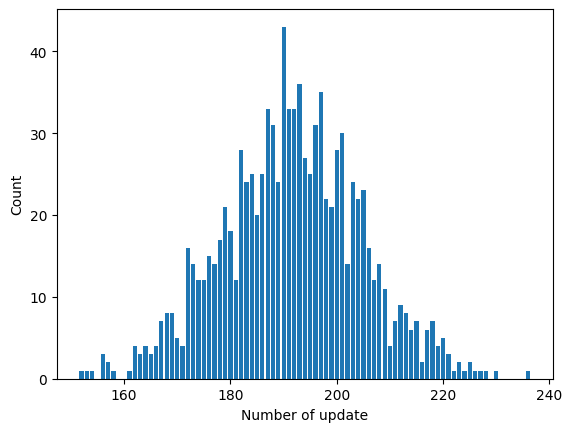

Median: 192.0


In [34]:
# 11

# x0 * 11.26
data1126 = data
data1126[:, 0] *= 11.26
total_update_cnt = np.zeros(1000)
for seed in range(1000):
    random.seed(seed)
    success_cnt = 0
    update_cnt = 0
    wpla = np.zeros(dimension)
    while success_cnt < 5*data_size:
        rand_index = random.randint(0,data_size-1)
        wpla, correct = update(wpla, data1126[rand_index], y[rand_index])
        if correct:
            success_cnt+=1
        else:
            update_cnt+=1
    total_update_cnt[seed] = update_cnt

# plot
unique_elements, counts = np.unique(total_update_cnt, return_counts=True)
plt.bar(unique_elements, counts)
plt.xlabel('Number of update')
plt.ylabel('Count')
plt.show()
print("Median:", np.median(total_update_cnt))


The median become 192.0 which is smaller than before.

Moreover the middle of the plot becomes sharper, the performance each time becomes more average.

# Problem 12

Set x0 = 1 to every xn, and do not do any scaling. Modify your PLA above to a variant that keeps correcting the same example until it is perfectly classified. That is, when selecting an incorrect example (xn(t),yn(t)) for updating, the algorithm keeps using that example (that is, n(t+1) = n(t)) to update until the weight vector perfectly classifies the example (and each update counts!). Repeat the 1000 experiments above. Plot a histogram to visualize the distribution of the number of updates needed before returning wPLA. What is the median number of updates? Compare your result to that of Problem 9. Describe your findings.


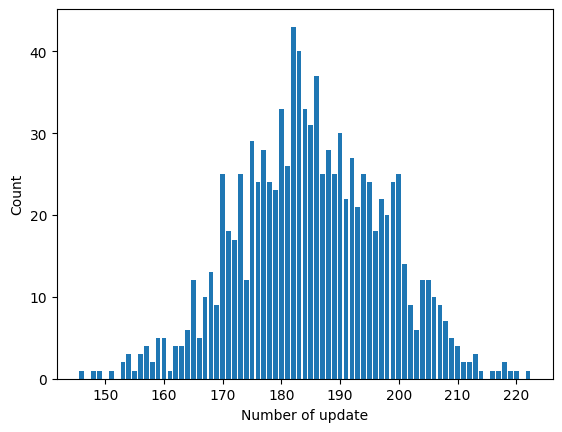

Median: 185.0


In [41]:
# 12
data_list = []
y = []
# read file into data and y
with open("data.txt", 'r') as file:
    for line in file:
        values = line.strip().split()
        values = [float(value) for value in values]
        values.insert(0, 1)
        data_list.append(values[0:-1])
        y.append(values[-1])

data = np.array(data_list)
y = np.array(y)

# check same x until valid
total_update_cnt = np.zeros(1000)
for seed in range(1000):
    random.seed(seed)
    success_cnt = 0
    update_cnt = 0
    wpla = np.zeros(dimension)
    while success_cnt < 5*data_size:
        rand_index = random.randint(0,data_size-1)

        while (np.dot(wpla,data[rand_index])*y[rand_index] <= 0):
            wpla += data[rand_index]*y[rand_index]
            update_cnt += 1

        success_cnt += 1

                
    total_update_cnt[seed] = update_cnt

# plot
unique_elements, counts = np.unique(total_update_cnt, return_counts=True)
plt.bar(unique_elements, counts)
plt.xlabel('Number of update')
plt.ylabel('Count')
plt.show()
print("Median:", np.median(total_update_cnt))


The median becomes smaller again, with a value of 185.0. 

The middle part of the plot becomes way more sharper than next time. More trial's update count becomes closer to average.